In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
path = '../input/the-simpsons-characters-dataset/simpsons_dataset'


In [3]:
dls = ImageDataLoaders.from_folder(path, train=path, valid_pct=0.2, 
                                   seed=5, item_tfms=Resize(224))

In [4]:
learn = vision_learner(dls, resnet34, metrics = [accuracy,error_rate])
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.873475,0.469074,0.869939,0.130061,06:40


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.201011,0.113729,0.970381,0.029619,06:40
1,0.082907,0.049322,0.988773,0.011227,06:30
2,0.031219,0.031444,0.993790,0.006210,06:36


In [ ]:
#doc(ImageDataLoaders.from_folder)

In [5]:
images = get_image_files('../input/the-simpsons-characters-dataset/')

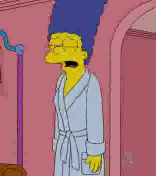

In [6]:
img = PILImage.create(images[5])
img

In [7]:
lbl, _, probs = learn.predict(img)
print(f"This is {lbl}.")

This is marge_simpson.


In [8]:
test = '../input/simpsons-test/bart_opt_wodqc5.jpg'

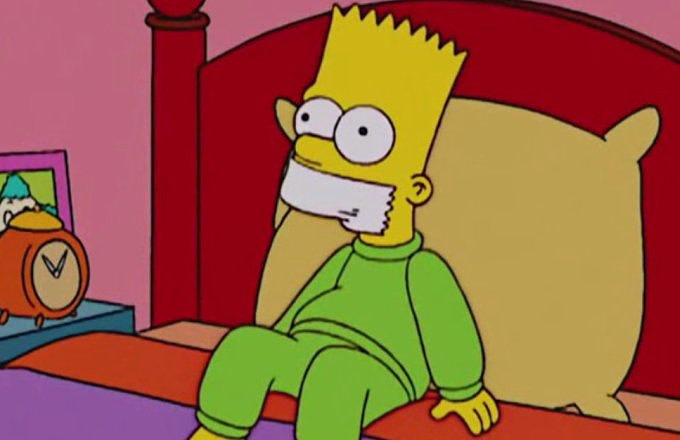

In [9]:
img1 = PILImage.create(test)
img1

In [10]:
lbl1, idx, probs = learn.predict(img1)
print(f"This is {lbl1}.")
print(f"Probability it's {lbl1}: {probs[idx.item()].item():.3f}")

This is bart_simpson.
Probability it's bart_simpson: 1.000


In [11]:
learn.export('/kaggle/working/model.pkl')

In [12]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('model.pkl')]

In [13]:
learn_inf = load_learner('/kaggle/working/model.pkl')

In [14]:
#learn_inf.dls.vocab

In [15]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [16]:
img = PILImage.create(btn_upload.data[-1])

In [17]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [18]:
pred,pred_idx,probs = learn_inf.predict(img)

In [19]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: maggie_simpson; Probability: 0.9999')

In [20]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [21]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability:{probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [22]:
VBox([widgets.Label('Select your Simpson character!'),
      btn_upload, btn_run, out_pl, lbl_pred])